# EDA: describe

Es una ampliacion de la informacion descriptiva del metodo *describe()* de *Pandas*.

In [1]:
%matplotlib inline
import sys
sys.path.append('../../') 
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 99
import numpy as np
from datetime import datetime
from eda import describe_info, describe_numeric, describe_categorical, describe_datetime, describe_bivariate, describe_missing, describe_duplicates, describe_outliers

---
## LOAD *Titanic* data

In [11]:
import seaborn
data = seaborn.load_dataset('titanic')
data.shape

(891, 15)

### general info

In [12]:
dfinfo = describe_info(data)
dfinfo

,types,mixed_types,unique,magnitude,%nan,num_records
variable,,,,,,
adult_male,bool,bool,2,NaN,0.00,891
alone,bool,bool,2,NaN,0.00,891
class,category,str,3,NaN,0.00,891
deck,category,str,7,NaN,77.22,203
age,float64,float,88,1.0,19.87,714
fare,float64,float,248,1.0,0.00,891
survived,int64,int,2,0.0,0.00,891
pclass,int64,int,3,0.0,0.00,891
sibsp,int64,int,7,0.0,0.00,891


In [13]:
# int to str (cat)
for col in dfinfo[dfinfo.types=='int64'].index.tolist():
    data[col] = data[col].astype(str)

### numerical

In [14]:
# describe
dfn = describe_numeric(data, alpha = .05)
dfn

[info] Function "describe_numeric()" finished in 1.98 seconds.


,count,mode,mode_per,mean,std,iqr,min,5%,25%,50%,75%,95%,max,kurtosis,skew,uniform,gaussian,expo,unimodal
age,714,24.00,4.20,29.7,14.53,17.88,0.42,4.00,20.12,28.00,38.0,56.00,80.00,0.17,0.39,False,False,False,True
fare,891,8.05,4.83,32.2,49.69,23.09,0.00,7.22,7.91,14.45,31.0,112.08,512.33,33.20,4.78,False,False,False,True


### categorical

In [15]:
# describe
dfc = describe_categorical(data.copy(), max_size_cats = 4, alpha = .05)
dfc

[info] Function "describe_categorical()" finished in 0.11 seconds.


,count,unique,uniform,value0,value1,value2,value3,%value0,%value1,%value2,%value3
var,,,,,,,,,,,
survived,891,2,False,0,1,,,61.62,38.38,,
pclass,891,3,False,3,1,2,,55.11,24.24,20.65,
sex,891,2,False,male,female,,,64.76,35.24,,
sibsp,891,7,False,0,1,2,others,68.24,23.46,3.14,5.17
parch,891,7,False,0,1,2,others,76.09,13.24,8.98,1.68
embarked,889,3,False,S,C,Q,,72.44,18.9,8.66,
class,891,3,False,Third,First,Second,,55.11,24.24,20.65,
who,891,3,False,man,woman,child,,60.27,30.42,9.32,
adult_male,891,2,False,True,False,,,60.27,39.73,,


### bivariate relationship

In [16]:
describe_bivariate(data)

[info] it was simplified the categorical variable 'sibsp'.
[info] it was simplified the categorical variable 'parch'.
[info] it was simplified the categorical variable 'deck'.
[info] Function "describe_bivariate()" finished in 1.47 seconds.


,variable1,variable2,depend_corr_linear,corr_linear,corr_non_linear,depend_chi2,subsamples_diff_dist
0,age,fare,True,0.1,0.2,NaN,NaN
0,survived,pclass,NaN,NaN,NaN,True,NaN
1,survived,sex,NaN,NaN,NaN,True,NaN
2,survived,sibsp,NaN,NaN,NaN,True,NaN
3,survived,parch,NaN,NaN,NaN,True,NaN
4,survived,embarked,NaN,NaN,NaN,True,NaN
5,survived,class,NaN,NaN,NaN,True,NaN
6,survived,who,NaN,NaN,NaN,True,NaN
7,survived,adult_male,NaN,NaN,NaN,True,NaN
8,survived,deck,NaN,NaN,NaN,False,NaN


### missing values

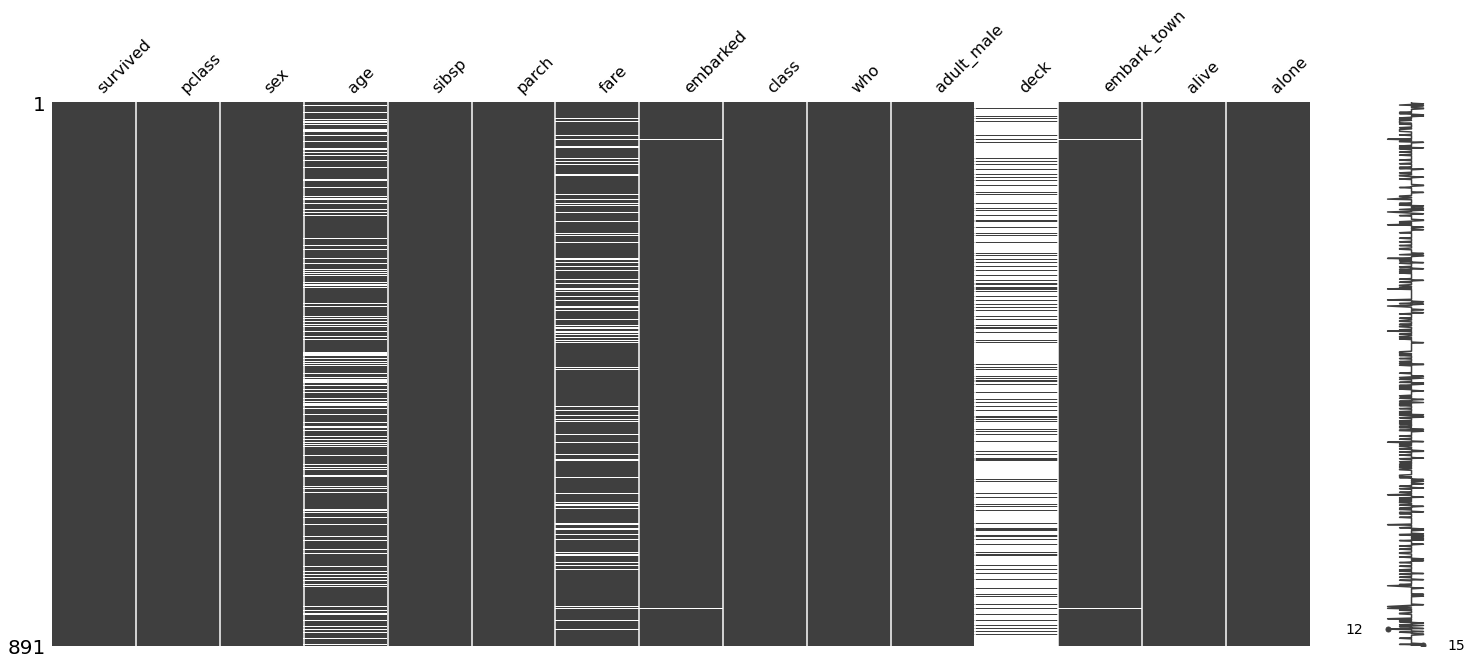

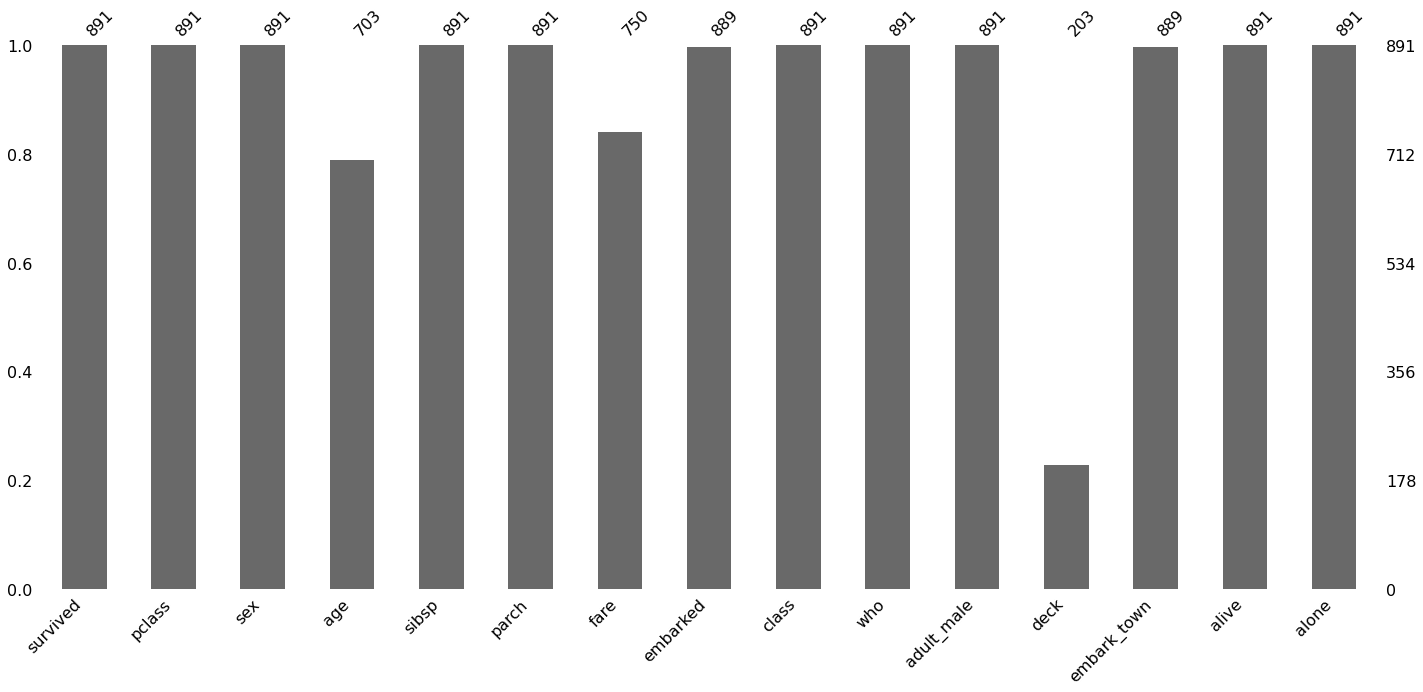

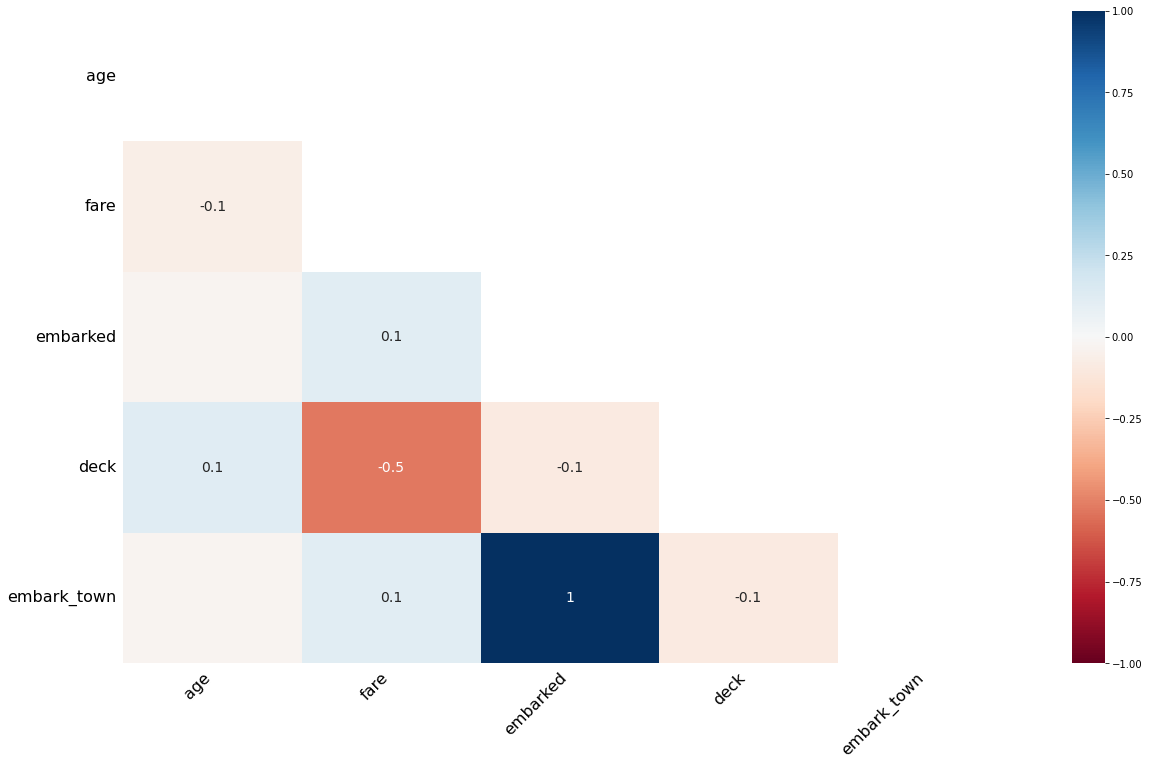

In [17]:
describe_missing(data)

### outliers analysis

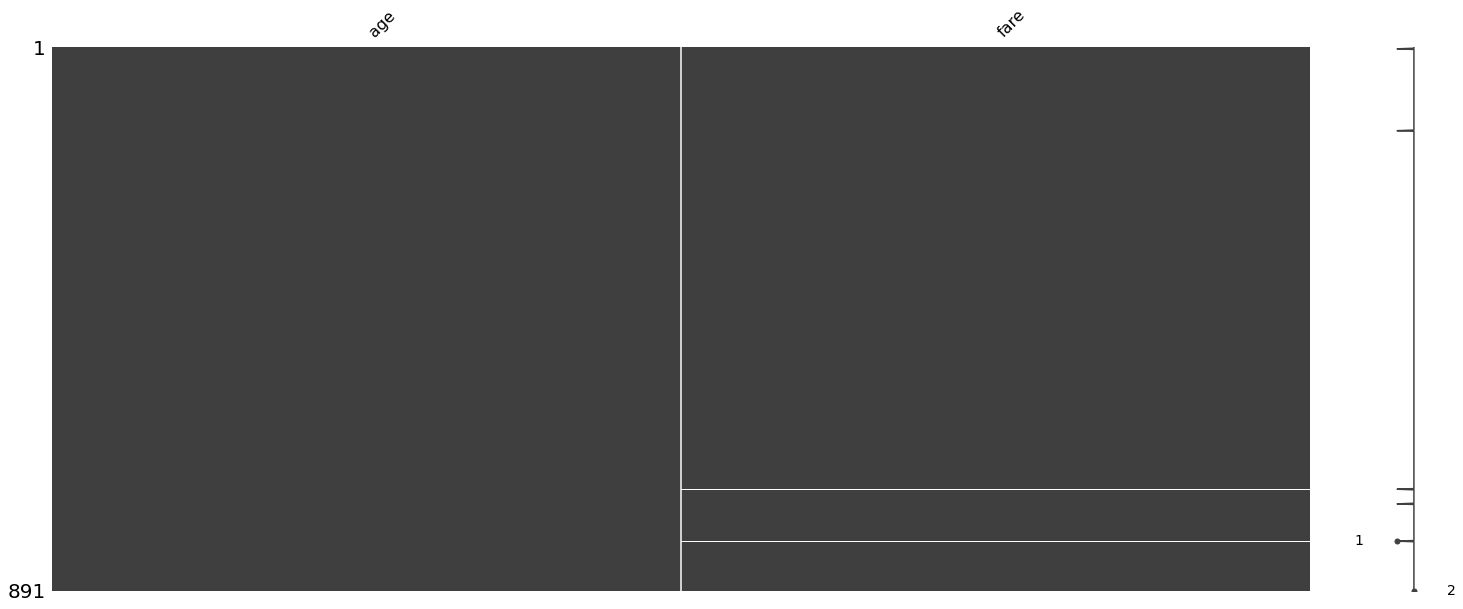

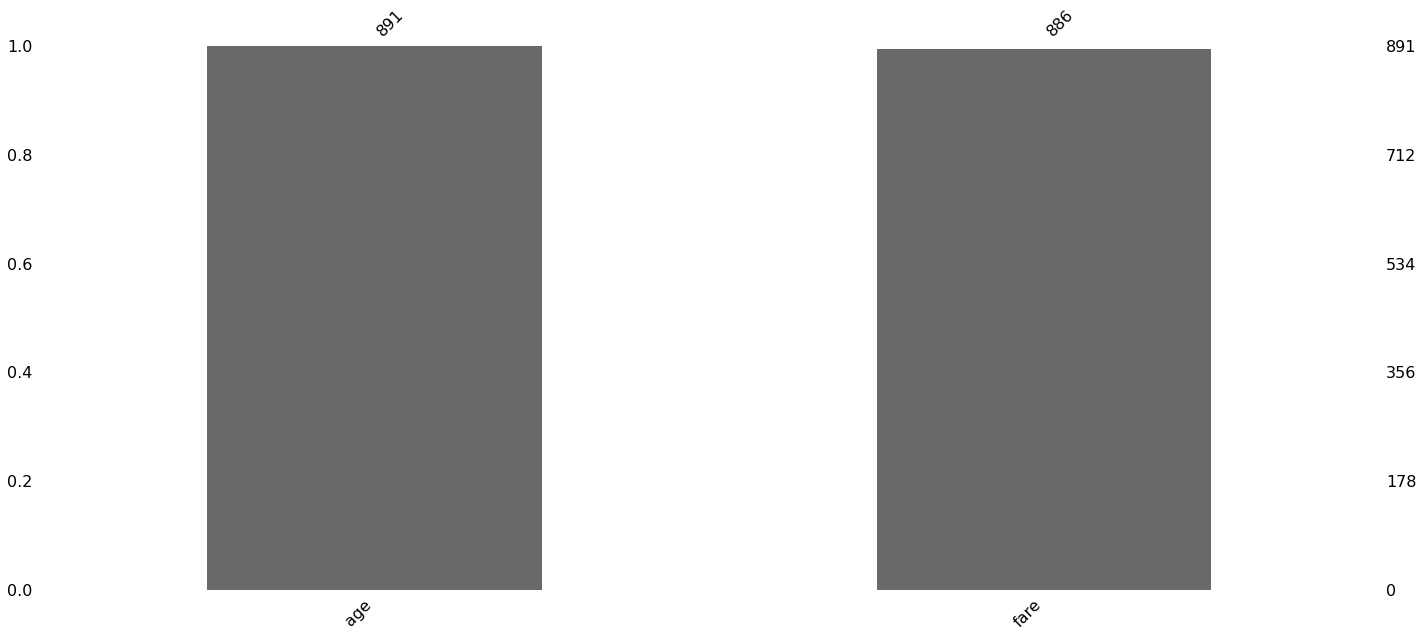

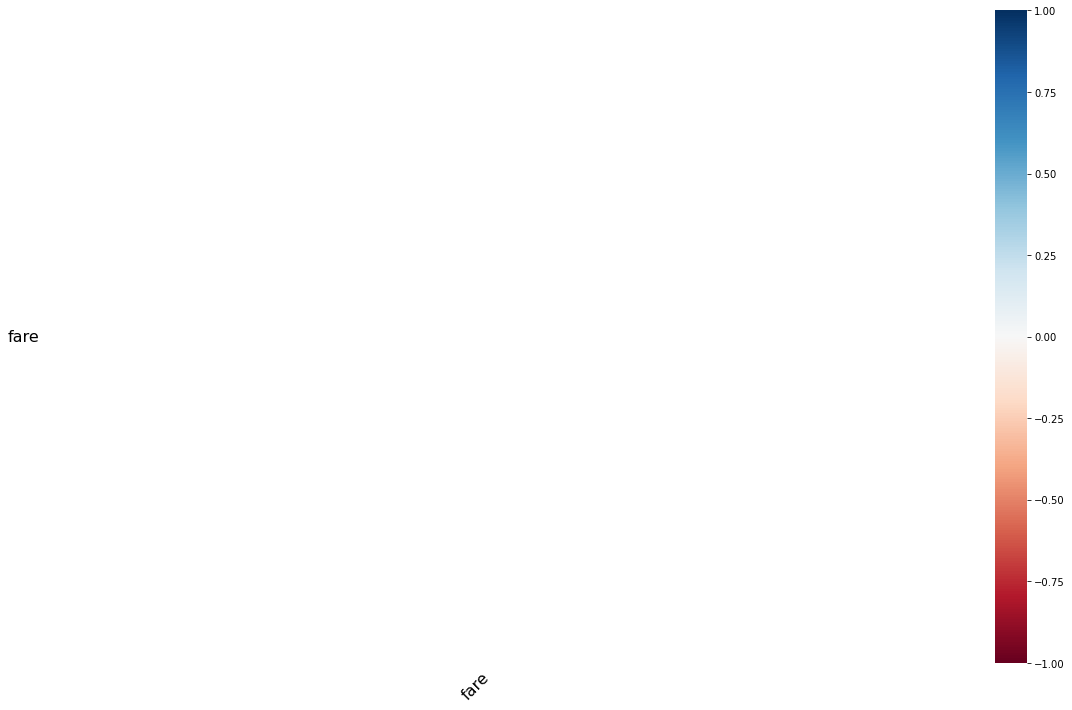

In [18]:
describe_outliers(data)

### duplicates

In [19]:
describe_duplicates(data)

[info] Function "describe_duplicates()" finished in 14.39 seconds.


,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,num_cols,percent_dupli
8190,survived,pclass,sex,sibsp,parch,embarked,class,who,adult_male,deck,embark_town,alive,alone,13,70.819304
8180,survived,pclass,sex,sibsp,parch,embarked,class,who,adult_male,embark_town,alive,alone,,12,79.461279
8185,survived,pclass,sex,sibsp,embarked,class,who,adult_male,deck,embark_town,alive,alone,,12,77.777778
8186,survived,pclass,sex,parch,embarked,class,who,adult_male,deck,embark_town,alive,alone,,12,76.206510
8182,survived,pclass,sex,sibsp,parch,embarked,class,adult_male,deck,embark_town,alive,alone,,12,73.400673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,embarked,,,,,,,,,,,,,1,99.551066
10,embark_town,,,,,,,,,,,,,1,99.551066
3,sibsp,,,,,,,,,,,,,1,99.438833
4,parch,,,,,,,,,,,,,1,99.438833
